# Kaggle API

In [ ]:
#!pip install kaggle

#!rm -r /root/.kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d jangedoo/utkface-new

! unzip utkface-new.zip

#! kaggle datasets list

# GPU

In [36]:
import tensorflow as tf

In [ ]:
device_list = tf.test.gpu_device_name()

device_list

In [ ]:
!nvidia-smi

Fri May  5 18:19:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    47W / 400W |    691MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# PACKAGES

In [37]:
import numpy as np
import pandas as pd 
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16
from skimage.feature import hog
from skimage import data, exposure
import random
from keras import layers, losses
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import math
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [92]:

def display(img):
    plt.imshow(img)
    plt.show()
    
    
def metrics_gender(X, y): 
    y_pred = clf.predict(X)

    mcc = matthews_corrcoef(y, y_pred)
   
    print("MCC: ", mcc)
    
    print(classification_report(y_test, y_pred))

    labelGender = list(set(genders))

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    
def metrics_age(X, y):

    y_pred = clf.predict(X)

    y_test_int = np.argmax(y, axis=1)
    y_pred_int = np.argmax(y_pred, axis=1)

 
    mcc = matthews_corrcoef(y_test_int, y_pred_int)

    print("MCC: ", mcc)

    print(classification_report(y_test_int, y_pred_int))

    labelage= list(set(age_classes))

    cm = confusion_matrix(y_test_int, y_pred_int)

    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)
    # set plot labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
     

In [39]:
#path server
#path = "/UTKFace/"
#path colab
#path = "/content/utkface_aligned_cropped/UTKFace"
#path martim
#path = "../../../../DadosProj/UTKFace/"
#path alex
path = "../../../data_project/UTKFace/"

files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


# DATA NORM

In [86]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 100:
        break

    image = cv2.imread(os.path.join(path, file))
    if image is not None and image.any():
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, dsize=(200, 200))
        image = image.reshape((image.shape[0], image.shape[1], 3)) 
        image = image / 255.0

        images.append(image)
        delimit = file.split('_')
        ages.append(int(delimit[0]))
        genders.append(int(delimit[1]))

        counter += 1
        
X = np.squeeze(images)

### Age classes
age_classes = []
for i in ages:
    i = int(i)
    if i <= 1:
        age_classes.append(0)
    if (i>1) and (i<=13):
        age_classes.append(1)
    if (i>13) and (i<17):
        age_classes.append(2)
    if (i>=17) and (i<30):
        age_classes.append(3)
    if (i>=30) and (i<60):
        age_classes.append(4)
    if i>=60:
        age_classes.append(5)

age_labels = ["Baby",   # index 0
        "Infant",       # index 1
        "Adolescent",   # index 2 
        "Young Adult",  # index 3 
        "Adult"         # index 4
        "Old Adult",    # index 5
        ]

age_categories = to_categorical(age_classes, num_classes=6)
age_categories[:20]
print("Age Classes finished")

Age Classes finished


# DISTRIBUTIONS

In [63]:
img_all = pd.DataFrame()
img_all["age"] = age_classes
img_all["gender"] = genders

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = age_classes

print("age\n", img_age.age.value_counts())
print("gender\n", img_gender.gender.value_counts())

age
 1    81
5    19
Name: age, dtype: int64
gender
 0    86
1    14
Name: gender, dtype: int64


## Ages

c:\Users\afbso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

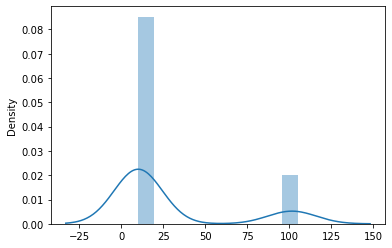

In [42]:
sns.distplot(ages)

## Age Classes

In [43]:
print(len(age_classes))
print(type(age_classes))
unique_values = list(set(age_classes))
print(unique_values)

100
<class 'list'>
[1, 5]


c:\Users\afbso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

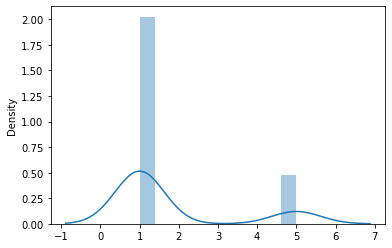

In [44]:
sns.distplot(age_classes)

## Gender

c:\Users\afbso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

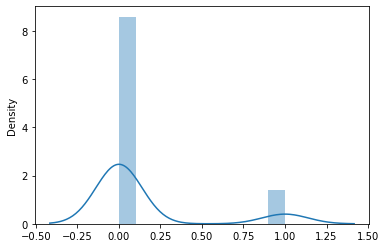

In [45]:
sns.distplot(genders)

# MODELS

## BASE

In [87]:
flattened_images = []

for image in images:
    flattened_image = image.flatten()
    flattened_images.append(flattened_image)

flattened_images_array = np.array(flattened_images)

print(flattened_images_array.shape)

(100, 120000)


### Gender

MCC:  0.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'y_pred = clf.predict(X_test)\n\nmcc = matthews_corrcoef(y_test, y_pred)\n#accuracy = accuracy_score(y_test, y_pred)\nprint("MCC: ", mcc)\n#print("Accuracy: ", accuracy)\nprint(classification_report(y_test, y_pred))\n#confusion_matrix(y_test, y_pred)\n\nlabelGender = list(set(genders))\n\n# assume y_true and y_pred are the true and predicted labels, respectively\ncm = confusion_matrix(y_test, y_pred)\n\n# create a heatmap of the confusion matrix using seaborn\nsns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelGender, yticklabels=labelGender)\n\n# set plot labels and title\nplt.xlabel(\'Predicted Label\')\nplt.ylabel(\'True Label\')\nplt.title(\'Confusion Matrix\')\nplt.savefig(\'CM_HOG_SVM_gender.png\')'

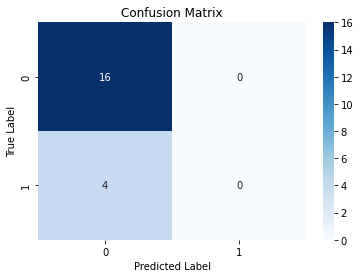

In [93]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(flattened_images_array, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)


metrics_gender(X_test, y_test)

### Age

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


MCC:  0.28867513459481287
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.83      1.00      0.91        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.28      0.33      0.30        20
weighted avg       0.62      0.75      0.68        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_cla

'# Convert one-hot encoded labels to integer form\ny_pred = clf.predict(X_test)\n\ny_test_int = np.argmax(y_test, axis=1)\ny_pred_int = np.argmax(y_pred, axis=1)\n\n# Print classification report and confusion matrix\nmcc = matthews_corrcoef(y_test_int, y_pred_int)\n\n#accuracy = accuracy_score(y_test, y_pred)\nprint("MCC: ", mcc)\n#print("Accuracy: ", accuracy)\nprint(classification_report(y_test_int, y_pred_int))\n#confusion_matrix(y_test, y_pred)\nlabelage= list(set(age_classes))\n# assume y_true and y_pred are the true and predicted labels, respectively\ncm = confusion_matrix(y_test_int, y_pred_int)\n# create a heatmap of the confusion matrix using seaborn\nsns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labelage, yticklabels=labelage)\n# set plot labels and title\nplt.xlabel(\'Predicted Label\')\nplt.ylabel(\'True Label\')\nplt.title(\'Confusion Matrix\')\nplt.savefig(\'CM_HOG_SVM_age.png\')\n\nprint("HOG finished")\n'

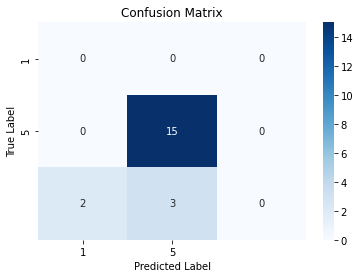

In [94]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images_array, age_categories, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)


metrics_age(X_test, y_test)

# DATA NOT NORM

In [96]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 100:
        break

    image = cv2.imread(os.path.join(path, file))
    if image is not None and image.any():
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, dsize=(200, 200))
        image = image.reshape((image.shape[0], image.shape[1], 3)) 
        #image = image / 255.0

        images.append(image)
        delimit = file.split('_')
        ages.append(int(delimit[0]))
        genders.append(int(delimit[1]))

        counter += 1
        
X = np.squeeze(images)

### Age classes
age_classes = []
for i in ages:
    i = int(i)
    if i <= 1:
        age_classes.append(0)
    if (i>1) and (i<=13):
        age_classes.append(1)
    if (i>13) and (i<17):
        age_classes.append(2)
    if (i>=17) and (i<30):
        age_classes.append(3)
    if (i>=30) and (i<60):
        age_classes.append(4)
    if i>=60:
        age_classes.append(5)

age_labels = ["Baby",   # index 0
        "Infant",       # index 1
        "Adolescent",   # index 2 
        "Young Adult",  # index 3 
        "Adult"         # index 4
        "Old Adult",    # index 5
        ]

age_categories = to_categorical(age_classes, num_classes=6)
age_categories[:20]

img_all = pd.DataFrame()
img_all["age"] = age_classes
img_all["gender"] = genders

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = age_classes

print("age\n", img_age.age.value_counts())
print("gender\n", img_gender.gender.value_counts())

age
 1    81
5    19
Name: age, dtype: int64
gender
 0    86
1    14
Name: gender, dtype: int64


## HOG

In [ ]:
image_check = images[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, visualize=True,channel_axis=2)



# rescale image intensity for better visualization
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# display HOG features
plt.imshow(hog_image)
plt.show()

In [ ]:
# Extract HOG features from the images
hog_features = []
for img in images:
    #hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
    #                cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, channel_axis=2)
    
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

# Normalize the features to have zero mean and unit variance
mean = np.mean(hog_features, axis=0)
std = np.std(hog_features, axis=0)
hog_features_norm = (hog_features - mean) / std

HOG started


### Gender

MCC:  0.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


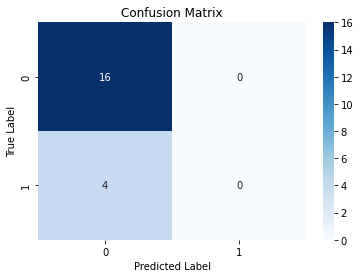

In [97]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


MCC:  0.4330127018922193
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.94      1.00      0.97        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.31      0.33      0.32        20
weighted avg       0.70      0.75      0.73        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_cla

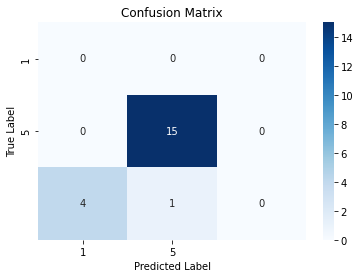

In [98]:
##### AGE
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, age_categories, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## ORB

ORB Started


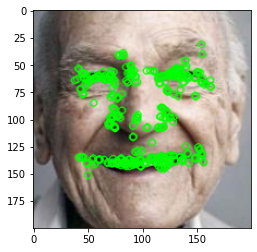

In [101]:
#### ORB
print("ORB Started")

image_check = images[1]

orb = cv2.ORB_create()

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()


orb = cv2.ORB_create()
# define minimum and maximum keypoints
MIN_KEYPOINTS = 100
orb_features = []
orb_genders = []
orb_ages = []

# loop over images and keypoints
for i, img in enumerate(images):
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    keypoints = list(keypoints)    
    # check if number of keypoints is between min and max
    if len(keypoints) < MIN_KEYPOINTS:
        continue
        
    # remove extra keypoints randomly
    while len(keypoints) > MIN_KEYPOINTS:
        idx = random.randint(0, len(keypoints)-1)
        keypoints.pop(idx)
        descriptors = np.delete(descriptors, idx, axis=0)
        
    # add descriptors to feature list
    orb_features.append(np.ndarray.flatten(descriptors))
    orb_genders.append(genders[i])
    orb_ages.append(age_categories[i])

mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

### Gender

MCC:  0.0
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


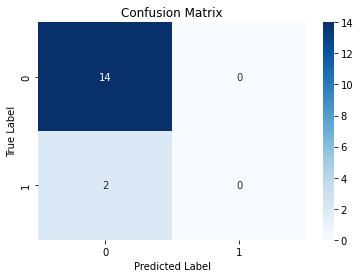

In [102]:
##### Gender
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

MCC:  0.0
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           5       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16



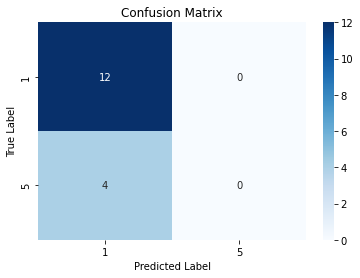

In [103]:
##### AGE
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, orb_ages, test_size=0.2, random_state=42)

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

# DATA NORM

In [106]:
images = []
ages = []
genders = []
counter = 0

for file in files:
    if counter == 100:
        break

    image = cv2.imread(os.path.join(path, file))
    if image is not None and image.any():
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, dsize=(200, 200))
        image = image.reshape((image.shape[0], image.shape[1], 3)) 
        image = image / 255.0

        images.append(image)
        delimit = file.split('_')
        ages.append(int(delimit[0]))
        genders.append(int(delimit[1]))

        counter += 1
        
X = np.squeeze(images)

### Age classes
age_classes = []
for i in ages:
    i = int(i)
    if i <= 1:
        age_classes.append(0)
    if (i>1) and (i<=13):
        age_classes.append(1)
    if (i>13) and (i<17):
        age_classes.append(2)
    if (i>=17) and (i<30):
        age_classes.append(3)
    if (i>=30) and (i<60):
        age_classes.append(4)
    if i>=60:
        age_classes.append(5)

age_labels = ["Baby",   # index 0
        "Infant",       # index 1
        "Adolescent",   # index 2 
        "Young Adult",  # index 3 
        "Adult"         # index 4
        "Old Adult",    # index 5
        ]

age_categories = to_categorical(age_classes, num_classes=6)
age_categories[:20]

img_all = pd.DataFrame()
img_all["age"] = age_classes
img_all["gender"] = genders

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = age_classes

print("age\n", img_age.age.value_counts())
print("gender\n", img_gender.gender.value_counts())

age
 1    81
5    19
Name: age, dtype: int64
gender
 0    86
1    14
Name: gender, dtype: int64


## VGG 16

In [107]:
print("VGG Started")
#### VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in VGG_model.layers:
	layer.trainable = False
	
VGG_model.summary()

X = np.stack(images)
X = VGG_model.predict(X)

VGG Started
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128) 

### Gender

MCC:  0.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


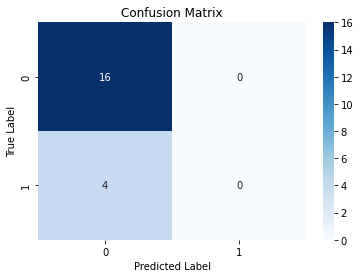

In [108]:
##### Gender
X_svm = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X_svm, genders, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

metrics_gender(X_test, y_test)

### Age

c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(


MCC:  0.36380343755449945
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.88      1.00      0.94        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.29      0.33      0.31        20
weighted avg       0.66      0.75      0.70        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_cla

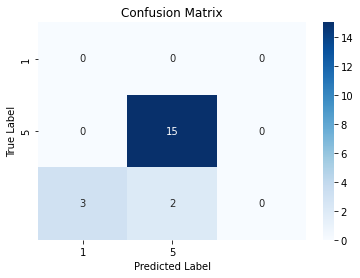

In [109]:
#### AGE
X_train, X_test, y_train, y_test = train_test_split(X_svm, age_categories, test_size=0.2, random_state=42)#variar a percentagem split

clf = OneVsRestClassifier(SVC())
clf.fit(X_train, y_train)

metrics_age(X_test, y_test)

## Autoencoder

### Gender

In [119]:
 ##### Gender
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [120]:
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_8 (Dense)             (None, 2000)              20002000  
                                                                 
 dense_9 (Dense)             (None, 10000)             2001

In [121]:
autoencoder.fit(x = X_train, 
                y = X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/2
3/3 [==============================] - 6s 1s/step - loss: 0.6930 - val_loss: 0.6928
Epoch 2/2
3/3 [==============================] - 3s 1s/step - loss: 0.6924 - val_loss: 0.6921


In [122]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)

encoded_X_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_X_test = pred_test.reshape((pred_test.shape[0], -1))

1/1 [==============================] - 0s 91ms/step


MCC:  0.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


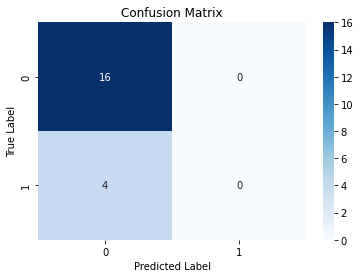

In [126]:
clf = SVC()
clf.fit(encoded_X_train, y_train)

metrics_gender(encoded_X_test, y_test)

### Age

In [127]:
X_train, X_test, y_train, y_test = train_test_split(images, age_categories, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

In [128]:
# binary cross entropy is good for imagprint("Autoencoder Started")
#### AUtoencoder
input = layers.Input(shape=(200, 200, 3))

#valor alto apanha artefactos, e valor baixo nao captura bem as features da imagem
latent_dim = 2000

## Classe 

# Encoder

#didnt increase filter count in encoder and decrease equally in decoder because
#it can lead to overfitting

x = layers.Conv2D(64, (3,3), activation='relu', padding='same', strides = 2)(input)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#dividir imagem por factor de 2
x = layers.Conv2D(32, (3,3), activation='relu', padding='same', strides = 2)(x)#reduziu se nr de filtros para 32 porque foi decidido factor de 32 filtros
#x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.MaxPooling2D((2,2), padding='same')(x)#25*25*16=10000
x = layers.Flatten()(x)
enc = layers.Dense(latent_dim, activation='relu')(x)

# Decoder

#having conv2D here helps to avoid checkerboard artifacts
#which are alternating points of colors (like checkerboard)
#that are consequence of deconvolutioning an image and cause 
#loss of quality in final reconstruction
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)

#equivalente a fazer dense layer no fim do encoder e no inicio do decoder
#fazer a layer dense fica um vector
#fazer reshape depois do 2 dense para voltar a ter imagem do vetor criado

x = layers.Dense(25*25*16, activation='relu')(enc)
x = layers.Reshape((25,25,16))(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(x)
#x = layers.UpSampling2D((2,2))(x)
output = layers.Conv2DTranspose(3, (3,3), activation='sigmoid', padding='same', strides = 2)(x)

#maybe use strides in the layers too
#example:
#x = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides = 2)(x)

# Autoencoder
autoencoder = Model(input, output)

# binary cross entropy is good for image feature extraction especially when images are normalized
autoencoder.compile(optimizer="adam", loss="binary_crossentropy",
            metrics=['accuracy'])

autoencoder.summary()#e feature extraction especially when images are normalized

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        18464     
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 16)        4624      
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_10 (Dense)            (None, 2000)              20002000  
                                                                 
 dense_11 (Dense)            (None, 10000)             2001

In [129]:
autoencoder.fit(X_train, X_train,
                epochs = 2,
                shuffle = True,
                batch_size = 32,
                validation_data = (X_test, X_test),
)

Epoch 1/2
3/3 [==============================] - 6s 1s/step - loss: 0.6930 - accuracy: 0.5687 - val_loss: 0.6927 - val_accuracy: 0.7286
Epoch 2/2
3/3 [==============================] - 3s 1s/step - loss: 0.6925 - accuracy: 0.7192 - val_loss: 0.6920 - val_accuracy: 0.7304


In [130]:
new_model = Model(input, enc)

pred_train = new_model.predict(X_train)
pred_test = new_model.predict(X_test)


encoded_train = pred_train.reshape((pred_train.shape[0], -1))
encoded_test = pred_test.reshape((pred_test.shape[0], -1))

1/1 [==============================] - 0s 86ms/step


c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\afbso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefined

MCC:  0.0
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           5       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



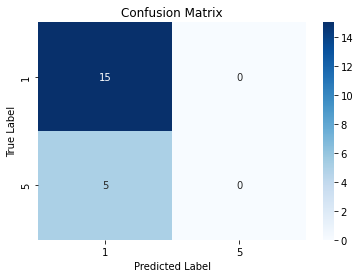

In [131]:
clf = OneVsRestClassifier(SVC())
clf.fit(encoded_train, y_train)


metrics_age(encoded_X_test, y_test) 